<a href="https://colab.research.google.com/github/whitehatjr1001/AI-age-predictor-/blob/main/Agepredection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
from google.colab import drive 
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('/content/drive/MyDrive/AGING AI/Final_data.csv')
data.head()

,SEQN,GENDER,Albumin_mgl,Glucose_mmolL,Urea_mmolL,Cholesterol_mmolL,Protein_gdL,Sodium_mmolL,Creatinine_mgdl,Hemoglobin_gdl,...,LDL_mmolL,Calcium_mmolL,Potassium_mmolL,AlkPhos_UL,Hematocrit_%,MCHC_gdl,MCV_fL,Platelet_TuL,RBC_MuL,AGE
0,2,M,9.1,4.646,6.8,5.56,7.2,144.1,145.0,14.1,...,3.52,2.325,4.06,62.0,41.8,33.6,88.5,214.0,4.73,77
1,5,M,6.1,5.550,5.7,7.21,7.3,137.5,172.0,14.5,...,4.34,2.375,4.63,63.0,43.6,33.3,84.9,209.0,5.13,49
2,7,F,6.7,4.756,3.6,6.34,8.1,143.2,128.0,13.4,...,3.28,2.450,4.25,75.0,40.2,33.3,87.4,244.0,4.60,59
3,10,M,11.1,4.989,4.6,3.62,7.6,140.9,279.0,15.4,...,2.07,2.350,4.28,86.0,46.2,33.5,92.3,167.0,5.00,43
4,12,M,34.3,4.606,7.1,4.03,7.2,141.3,99.0,16.0,...,2.30,2.200,3.81,63.0,48.1,33.3,83.5,357.0,5.76,37


In [4]:
data.shape
data = data.drop('SEQN',axis= 1)

In [ ]:
data.isna().sum()

GENDER                0
Albumin_mgl           0
Glucose_mmolL         0
Urea_mmolL            0
Cholesterol_mmolL     0
Protein_gdL           0
Sodium_mmolL          0
Creatinine_mgdl       0
Hemoglobin_gdl        0
Bilirubin_umolL       0
Triglyceride_mmolL    0
HDL_mmolL             0
LDL_mmolL             0
Calcium_mmolL         0
Potassium_mmolL       0
AlkPhos_UL            0
Hematocrit_%          0
MCHC_gdl              0
MCV_fL                0
Platelet_TuL          0
RBC_MuL               0
AGE                   0
dtype: int64

In [ ]:
data.describe()

,Albumin_mgl,Glucose_mmolL,Urea_mmolL,Cholesterol_mmolL,Protein_gdL,Sodium_mmolL,Creatinine_mgdl,Hemoglobin_gdl,Bilirubin_umolL,Triglyceride_mmolL,...,LDL_mmolL,Calcium_mmolL,Potassium_mmolL,AlkPhos_UL,Hematocrit_%,MCHC_gdl,MCV_fL,Platelet_TuL,RBC_MuL,AGE
count,22313.000000,22313.000000,22313.000000,22313.000000,22313.000000,22313.000000,22313.000000,22313.000000,2.231300e+04,22313.000000,...,22313.000000,22313.000000,22313.000000,22313.000000,22313.000000,22313.000000,22313.000000,22313.000000,22313.000000,22313.000000
mean,48.601267,5.946279,4.826378,5.023679,7.195922,139.274185,128.550890,14.173746,1.188252e+01,1.387242,...,2.987655,2.340415,4.037564,71.377314,41.937776,33.781777,89.521530,249.011782,4.696779,49.679200
std,366.800225,1.863722,2.112693,1.063232,0.490625,2.359596,78.035931,1.552937,5.219918e+00,0.766365,...,0.926346,0.091408,0.349613,25.657444,4.408195,1.000118,5.836804,67.193204,0.513081,18.073266
min,0.210000,1.170000,0.360000,1.780000,5.200000,107.000000,5.000000,6.100000,5.397605e-79,0.113000,...,0.233000,1.725000,2.500000,7.000000,17.900000,27.600000,50.800000,4.000000,1.670000,20.000000
25%,4.500000,5.107000,3.570000,4.270000,6.900000,138.000000,71.000000,13.200000,8.550000e+00,0.835000,...,2.330000,2.275000,3.800000,55.000000,39.000000,33.200000,86.600000,204.000000,4.360000,34.000000
50%,8.400000,5.500000,4.640000,4.940000,7.200000,139.000000,116.000000,14.200000,1.197000e+01,1.197000,...,2.922000,2.350000,4.000000,67.000000,42.000000,33.800000,90.000000,242.000000,4.690000,49.000000
75%,17.400000,6.061000,5.710000,5.660000,7.500000,141.000000,170.000000,15.200000,1.368000e+01,1.750000,...,3.543000,2.400000,4.220000,83.000000,45.100000,34.400000,93.100000,286.000000,5.040000,64.000000
max,24440.000000,32.418000,34.990000,11.970000,11.300000,155.000000,774.000000,19.700000,7.011000e+01,4.516000,...,9.698000,3.700000,6.500000,729.000000,59.000000,69.600000,121.900000,999.900000,8.300000,85.000000


<ipython-input-6-5ffdc1e8ec86>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


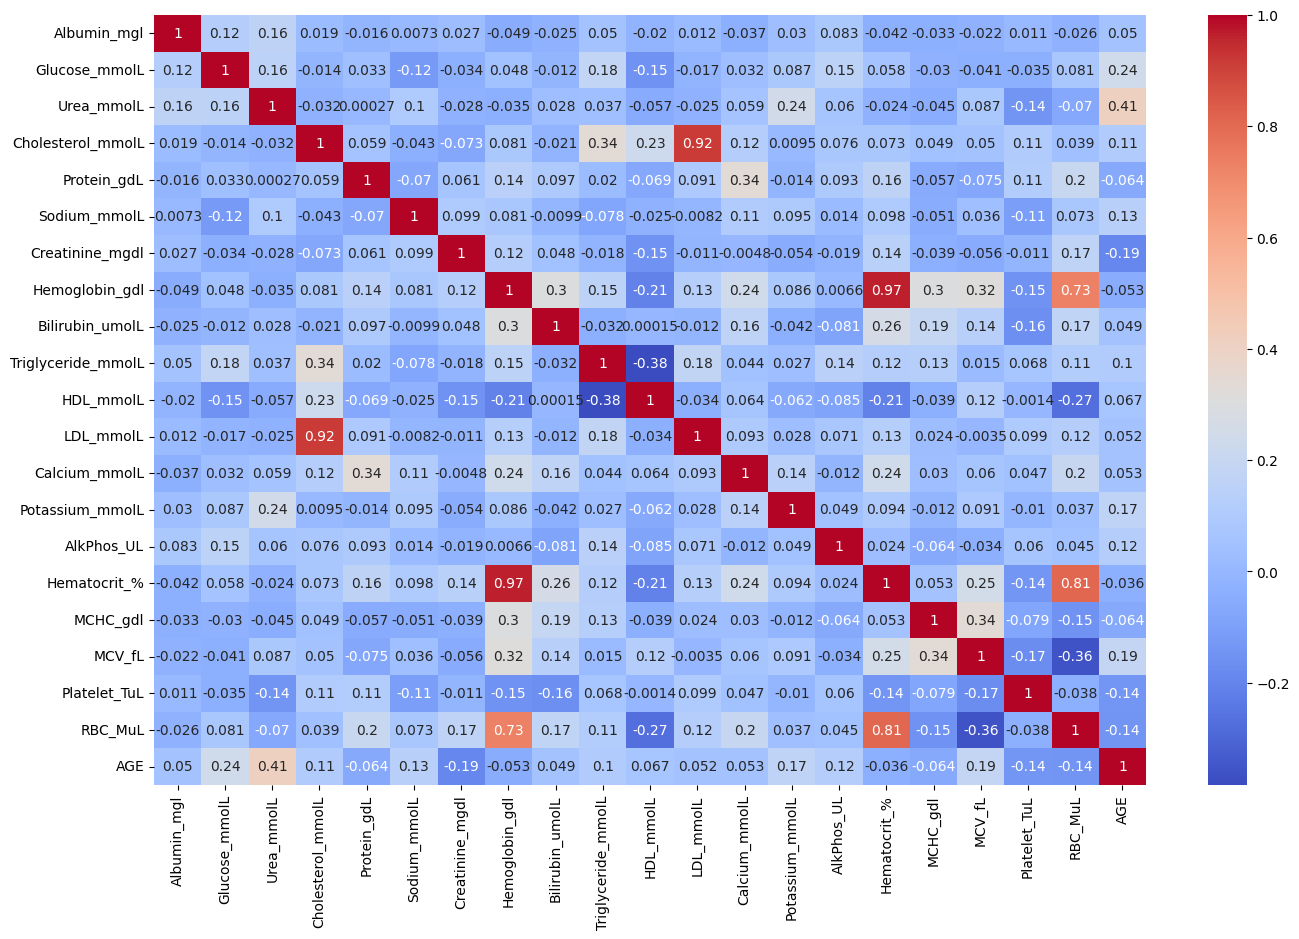

In [ ]:
plt.figure(figsize=(16,10))
corr = data.corr()
sns.heatmap(corr,annot= True,cmap ='coolwarm')
plt.show()

**REMOVING OUTLIERS **

In [5]:
def remove_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
    return data[z_scores <= threshold]

# Remove outliers from each feature
features = ['Albumin_mgl', 'Glucose_mmolL', 'Urea_mmolL', 'Cholesterol_mmolL', 'Protein_gdL',
            'Sodium_mmolL', 'Creatinine_mgdl', 'Hemoglobin_gdl', 'Bilirubin_umolL', 'Triglyceride_mmolL',
            'LDL_mmolL', 'Calcium_mmolL', 'Potassium_mmolL', 'AlkPhos_UL', 'Hematocrit_%',
            'MCHC_gdl', 'MCV_fL', 'Platelet_TuL', 'RBC_MuL', 'AGE']

final_df = data.copy()  # Create a copy of the original DataFrame

for feature in features:
    final_df = remove_outliers_zscore(final_df, feature)


In [6]:
final_df.describe()
#df=final_df.copy()

,Albumin_mgl,Glucose_mmolL,Urea_mmolL,Cholesterol_mmolL,Protein_gdL,Sodium_mmolL,Creatinine_mgdl,Hemoglobin_gdl,Bilirubin_umolL,Triglyceride_mmolL,...,LDL_mmolL,Calcium_mmolL,Potassium_mmolL,AlkPhos_UL,Hematocrit_%,MCHC_gdl,MCV_fL,Platelet_TuL,RBC_MuL,AGE
count,18788.000000,18788.000000,18788.000000,18788.000000,18788.000000,18788.000000,18788.000000,18788.000000,1.878800e+04,18788.000000,...,18788.000000,18788.000000,18788.000000,18788.000000,18788.000000,18788.000000,18788.000000,18788.000000,18788.000000,18788.000000
mean,20.994105,5.696183,4.654549,4.994991,7.184229,139.379290,126.061901,14.267660,1.170684e+01,1.322801,...,2.979203,2.338616,4.026606,68.942250,42.166319,33.829279,89.905567,246.514052,4.698980,48.954013
std,64.083480,1.039644,1.610097,0.984036,0.460395,2.154364,71.163692,1.403256,4.557734e+00,0.676543,...,0.858686,0.084500,0.320254,20.201348,4.045019,0.880280,4.841940,59.814615,0.471351,17.929471
min,0.210000,1.170000,0.360000,1.970000,5.800000,132.600000,5.000000,9.800000,5.397605e-79,0.113000,...,0.543000,2.075000,3.030000,9.000000,29.800000,31.000000,73.400000,60.000000,3.270000,20.000000
25%,4.300000,5.107000,3.570000,4.290000,6.900000,138.000000,71.000000,13.300000,8.550000e+00,0.820000,...,2.353000,2.275000,3.800000,54.000000,39.275000,33.300000,86.900000,204.000000,4.370000,33.000000
50%,7.800000,5.495000,4.600000,4.940000,7.200000,139.000000,117.000000,14.300000,1.197000e+01,1.163000,...,2.922000,2.350000,4.000000,66.000000,42.200000,33.800000,90.100000,241.000000,4.690000,48.000000
75%,15.200000,5.995000,5.710000,5.640000,7.500000,141.000000,169.000000,15.200000,1.368000e+01,1.682000,...,3.543000,2.400000,4.200000,81.000000,45.100000,34.400000,93.100000,284.000000,5.030000,63.000000
max,1135.000000,11.380000,10.710000,8.170000,8.600000,146.000000,365.000000,18.700000,2.740000e+01,3.624000,...,5.612000,2.600000,5.040000,141.000000,54.300000,36.600000,105.700000,441.000000,6.130000,85.000000


In [7]:
df=final_df.copy()
df['GENDER']=df['GENDER'].replace({'M':0,'F':1})
df

,GENDER,Albumin_mgl,Glucose_mmolL,Urea_mmolL,Cholesterol_mmolL,Protein_gdL,Sodium_mmolL,Creatinine_mgdl,Hemoglobin_gdl,Bilirubin_umolL,...,LDL_mmolL,Calcium_mmolL,Potassium_mmolL,AlkPhos_UL,Hematocrit_%,MCHC_gdl,MCV_fL,Platelet_TuL,RBC_MuL,AGE
0,0,9.1,4.646,6.80,5.56,7.2,144.1,145.0,14.1,12.00,...,3.520,2.325,4.06,62.0,41.8,33.6,88.5,214.0,4.73,77
2,1,6.7,4.756,3.60,6.34,8.1,143.2,128.0,13.4,6.80,...,3.280,2.450,4.25,75.0,40.2,33.3,87.4,244.0,4.60,59
3,0,11.1,4.989,4.60,3.62,7.6,140.9,279.0,15.4,6.80,...,2.070,2.350,4.28,86.0,46.2,33.5,92.3,167.0,5.00,43
4,0,34.3,4.606,7.10,4.03,7.2,141.3,99.0,16.0,6.80,...,2.300,2.200,3.81,63.0,48.1,33.3,83.5,357.0,5.76,37
5,1,6.5,5.484,4.30,5.15,7.2,135.7,188.0,13.3,8.60,...,3.390,2.300,4.19,31.0,40.2,33.1,97.1,255.0,4.14,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22306,1,3.8,5.107,3.93,4.63,7.0,139.0,89.0,15.7,18.81,...,2.095,2.375,3.50,44.0,46.0,34.1,99.3,316.0,4.64,39
22307,1,1.8,5.940,3.93,6.54,7.1,141.0,8.0,14.1,11.97,...,4.319,2.400,4.10,69.0,42.2,33.6,84.4,431.0,4.99,55
22309,1,2.4,6.051,5.00,4.42,7.3,137.0,64.0,13.1,6.84,...,2.276,2.300,3.90,88.0,37.5,34.8,78.2,265.0,4.80,71
22310,0,5.2,5.551,3.93,4.97,7.3,144.0,81.0,14.7,13.68,...,3.207,2.450,4.30,55.0,43.9,33.4,87.6,310.0,5.01,48


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [9]:
x=df.drop(['AGE'],axis=1).values
y=df['AGE'].values



In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=10,shuffle=True)

In [11]:
xtrain_scaled=scaler.fit_transform(X_train)
xtest_scaled=scaler.transform(X_test)


(15030, 21)

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Conv1D,Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

from tensorflow.keras.regularizers import l2

In [13]:
X_train_reshaped = xtrain_scaled.reshape(xtrain_scaled.shape[0], xtrain_scaled.shape[1], 1)
X_test_reshaped = xtest_scaled.reshape(xtest_scaled.shape[0], xtest_scaled.shape[1], 1)

In [27]:
model = Sequential()
model.add(Conv1D(16, 3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(Flatten())
model.add(Dense(128, activation='gelu'))
model.add(Dense(64, activation='gelu', kernel_regularizer=l2(0.01)))
model.add(Dense(64, activation='gelu', kernel_regularizer=l2(0.01)))
model.add(Dense(64, activation='gelu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='gelu'))
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [15]:
xtrain_scaled.shape


(15030, 21)

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 19, 16)            64        
                                                                 
 flatten_4 (Flatten)         (None, 304)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               39040     
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 64)                4160      
                                                                 
 dense_24 (Dense)            (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)               

In [ ]:
callbacks = tf.kears.callback.Model

(15030, 21, 1)

In [29]:
history = model.fit(X_train_reshaped,y_train, 
                              validation_data=(X_test_reshaped,y_test),
                              epochs=100,batch_size=32, verbose=1)


Epoch 1/100
470/470 [==============================] - 3s 3ms/step - loss: 357.1735 - val_loss: 181.8948
Epoch 2/100
470/470 [==============================] - 1s 2ms/step - loss: 191.7928 - val_loss: 172.0430
Epoch 3/100
470/470 [==============================] - 1s 2ms/step - loss: 181.8338 - val_loss: 169.4304
Epoch 4/100
470/470 [==============================] - 1s 2ms/step - loss: 176.4975 - val_loss: 175.4664
Epoch 5/100
470/470 [==============================] - 1s 2ms/step - loss: 170.2655 - val_loss: 170.4299
Epoch 6/100
470/470 [==============================] - 1s 2ms/step - loss: 165.1189 - val_loss: 181.9774
Epoch 7/100
470/470 [==============================] - 1s 2ms/step - loss: 160.9254 - val_loss: 186.5552
Epoch 8/100
470/470 [==============================] - 1s 2ms/step - loss: 157.7911 - val_loss: 171.1754
Epoch 9/100
470/470 [==============================] - 1s 3ms/step - loss: 154.6265 - val_loss: 162.1899
Epoch 10/100
470/470 [==============================] -

In [24]:
predictions = model.predict(X_train_reshaped)

470/470 [==============================] - 1s 954us/step


In [25]:
for i in range(len(predictions)):
  print("Predicted: {:.2f}  |  Actual: {:.2f}".format(predictions[i][0], y_train[i]))

Streaming output truncated to the last 5000 lines.
Predicted: 58.53  |  Actual: 64.00
Predicted: 36.20  |  Actual: 37.00
Predicted: 67.31  |  Actual: 73.00
Predicted: 48.25  |  Actual: 58.00
Predicted: 40.95  |  Actual: 47.00
Predicted: 48.76  |  Actual: 51.00
Predicted: 43.99  |  Actual: 49.00
Predicted: 41.86  |  Actual: 45.00
Predicted: 23.59  |  Actual: 24.00
Predicted: 27.15  |  Actual: 22.00
Predicted: 32.52  |  Actual: 28.00
Predicted: 33.88  |  Actual: 40.00
Predicted: 31.19  |  Actual: 34.00
Predicted: 30.47  |  Actual: 33.00
Predicted: 44.13  |  Actual: 51.00
Predicted: 59.54  |  Actual: 69.00
Predicted: 40.37  |  Actual: 43.00
Predicted: 29.36  |  Actual: 28.00
Predicted: 23.95  |  Actual: 23.00
Predicted: 27.41  |  Actual: 29.00
Predicted: 57.01  |  Actual: 61.00
Predicted: 30.08  |  Actual: 29.00
Predicted: 63.31  |  Actual: 72.00
Predicted: 44.91  |  Actual: 48.00
Predicted: 54.01  |  Actual: 64.00
Predicted: 39.61  |  Actual: 36.00
Predicted: 54.67  |  Actual: 55.00
Pred